In [1]:
import numpy as np
import dlib
import eos
import cv2

In [47]:
detector = dlib.get_frontal_face_detector()
shape_predictor = dlib.shape_predictor('res/68.dat')
img = cv2.imread('sexy.jpg')

In [48]:
boxes = detector(img)
landmarks = []

landmarks_list_2 = []
for box in boxes:
    shape = shape_predictor(img, box)
    index = 1
    for part in shape.parts():
        landmarks.append(eos.core.Landmark(str(index),[float(part.y),float(part.x)]))
        index +=1
        
    for i in range(0, shape.num_parts):
        landmarks_list_2.append((shape.part(i).x, shape.part(i).y))

	# for each landmark, plot and write numbe
    """
    for landmark_num, xy in enumerate(landmarks_list_2, start = 1):
        cv2.circle(img, (xy[0], xy[1]), 12, (168, 0, 20), -1)
        cv2.putText(img, str(landmark_num),(xy[0]-7,xy[1]+5), cv2.FONT_HERSHEY_SIMPLEX, 0.4,(255,255,255), 1)
    """

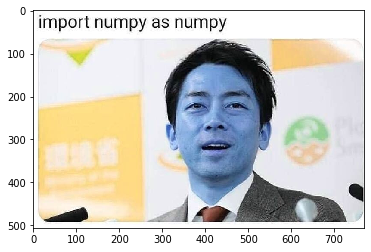

In [63]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [64]:
model = eos.morphablemodel.load_model("res/sfm_shape_3448.bin")
blendshapes = eos.morphablemodel.load_blendshapes("res/expression_blendshapes_3448.bin")
morphablemodel_with_expressions = eos.morphablemodel.MorphableModel(
    model.get_shape_model(), 
    blendshapes,
    color_model=eos.morphablemodel.PcaModel(),
    texture_coordinates=model.get_texture_coordinates()
)
landmark_mapper = eos.core.LandmarkMapper('res/ibug_to_sfm.txt')
edge_topology = eos.morphablemodel.load_edge_topology('res/sfm_3448_edge_topology.json')
contour_landmarks = eos.fitting.ContourLandmarks.load('res/ibug_to_sfm.txt')
model_contour = eos.fitting.ModelContour.load('res/sfm_model_contours.json')

In [65]:
h,w = img.shape[:2]
print(h,w)

506 771


In [66]:
(mesh, pose, shape_coeffs, blendshape_coeffs) = eos.fitting.fit_shape_and_pose(morphablemodel_with_expressions,
        landmarks, landmark_mapper, w, h, edge_topology, contour_landmarks, model_contour)

In [71]:
isomap = eos.render.extract_texture(mesh, pose, img)


In [72]:
isomap

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [70]:
cv2.imwrite("isomap.png", eos.core.to_map(isomap))

AttributeError: module 'eos.core' has no attribute 'to_map'

In [46]:
eos.core.write_textured_obj(mesh, "output.obj")